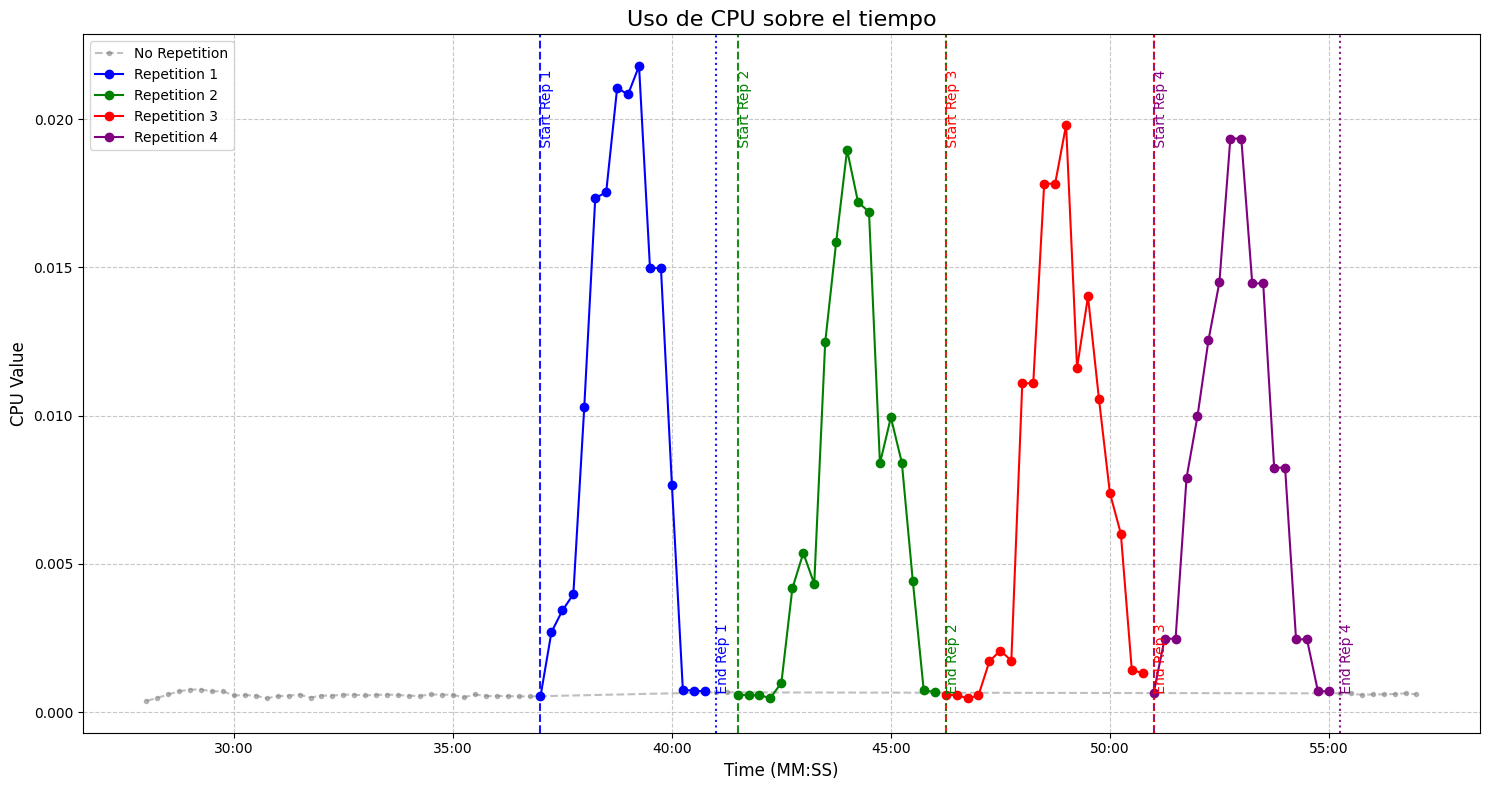

In [4]:
# 1. IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
from pathlib import Path

# 2. SETUP AND DATA LOADING
# Make sure to change this path to the correct location of your file
df = pd.read_csv('../thesis-data/tabla-tempo-cpu.csv')
pods = df['pod'].unique()

# 3. DEFINE TIME BOUNDARIES IN UTC (UPDATED VALUES)
target_date = '2025-09-21'
sd_tz = 'America/Santo_Domingo'

utc_start_1 = pd.to_datetime(f'{target_date} 01:37:00').tz_localize(sd_tz).tz_convert('UTC')
utc_end_1 = pd.to_datetime(f'{target_date} 01:41:00').tz_localize(sd_tz).tz_convert('UTC')

utc_start_2 = pd.to_datetime(f'{target_date} 01:41:30').tz_localize(sd_tz).tz_convert('UTC')
utc_end_2 = pd.to_datetime(f'{target_date} 01:46:15').tz_localize(sd_tz).tz_convert('UTC')

utc_start_3 = pd.to_datetime(f'{target_date} 01:46:15').tz_localize(sd_tz).tz_convert('UTC')
utc_end_3 = pd.to_datetime(f'{target_date} 01:51:00').tz_localize(sd_tz).tz_convert('UTC')

utc_start_4 = pd.to_datetime(f'{target_date} 01:51:00').tz_localize(sd_tz).tz_convert('UTC')
utc_end_4 = pd.to_datetime(f'{target_date} 01:55:15').tz_localize(sd_tz).tz_convert('UTC')


# 4. CREATE OUTPUT DIRECTORY
output_dir = Path("./separated-data")
output_dir.mkdir(parents=True, exist_ok=True)

# 5. PROCESS AND PLOT DATA FOR EACH POD
for pod in pods:
    # --- Data Preparation ---
    data = df[df['pod'] == pod].copy()
    data['date'] = pd.to_datetime(data['Time'], unit='ms', utc=True)
    data = data.rename(columns={'Value #A': 'value'})

    conditions = [
        (data['date'] >= utc_start_1) & (data['date'] < utc_end_1),
        (data['date'] >= utc_start_2) & (data['date'] < utc_end_2),
        (data['date'] >= utc_start_3) & (data['date'] < utc_end_3),
        (data['date'] >= utc_start_4) & (data['date'] < utc_end_4)
    ]
    choices = [1, 2, 3, 4]
    data['repetion'] = np.select(conditions, choices, default=0)

    # --- Plotting Logic ---
    fig, ax = plt.subplots(figsize=(15, 8))
    colors = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}

    background_data = data[data['repetion'] == 0]
    ax.plot(background_data['date'], background_data['value'],
            marker='.', color='gray', linestyle='--', label='No Repetition', alpha=0.5)

    repetitions = sorted(data[data['repetion'] > 0]['repetion'].unique())
    for rep in repetitions:
        rep_data = data[data['repetion'] == rep]
        ax.plot(rep_data['date'], rep_data['value'],
                marker='o',
                color=colors.get(rep, 'black'),
                label=f'Repetition {rep}')

    # --- Add Vertical Lines for Repetition Starts & Ends ---
    repetition_starts = {1: utc_start_1, 2: utc_start_2, 3: utc_start_3, 4: utc_start_4}
    repetition_ends = {1: utc_end_1, 2: utc_end_2, 3: utc_end_3, 4: utc_end_4}

    for rep, start_time in repetition_starts.items():
        ax.axvline(x=start_time, color=colors.get(rep, 'black'), linestyle='--', linewidth=1.5, alpha=0.9)
        ax.text(x=start_time, y=0.95, s=f' Start Rep {rep}', transform=ax.get_xaxis_transform(),
                color=colors.get(rep, 'black'), fontsize=10, rotation=90, verticalalignment='top')

    for rep, end_time in repetition_ends.items():
        ax.axvline(x=end_time, color=colors.get(rep, 'black'), linestyle=':', linewidth=1.5, alpha=0.9)
        ax.text(x=end_time, y=0.05, s=f' End Rep {rep}', transform=ax.get_xaxis_transform(),
                color=colors.get(rep, 'black'), fontsize=10, rotation=90, verticalalignment='bottom')

    # --- Finalize and Show Plot ---
    ax.set_title(f"Uso de CPU sobre el tiempo", fontsize=16)
    ax.set_xlabel('Time (MM:SS)', fontsize=12)
    ax.set_ylabel('CPU Value', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    date_formatter = DateFormatter('%M:%S')
    ax.xaxis.set_major_formatter(date_formatter)
    plt.tight_layout()
    plt.show()

    # --- Save Processed Data ---
    # out_df = data[['date', 'value', 'repetion']]
    # file_path = output_dir / f"cpu-usage-{pod.lower()}.csv"
    # out_df.to_csv(file_path, index=False)
    # print(f"Saved data for pod {pod} to {file_path}")

    # Remove this break if you want to run the script for all pods
    break